**EJERCICIO ÁRBOLES DE DECISIÓN**

In [1]:
# Cargamos a nuestro entorno de trabajo las librerías necesarias.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
# Cargamos la información del CSV en una variable llamada data
data = pd.read_csv("C:/Users/afeli/Documents/UNAD/UNAD/2023-II/Analisis de Datos/Etapa 2/archive arboles/wine.data", sep=",")

In [7]:
# Damos nombre a las columnas, segun la informacion del archivo wine.names de la actividad
nombres_columnas = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
					'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

# Cargamos los nombres de columnas en el dataset
data.columns = nombres_columnas

# Ejecutamos la variable data para mostrar la información cargada
data.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


**Tomamos como variable objetivo el tipo o clase de vino que puede ser 1, 2 o 3**

(array([58.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

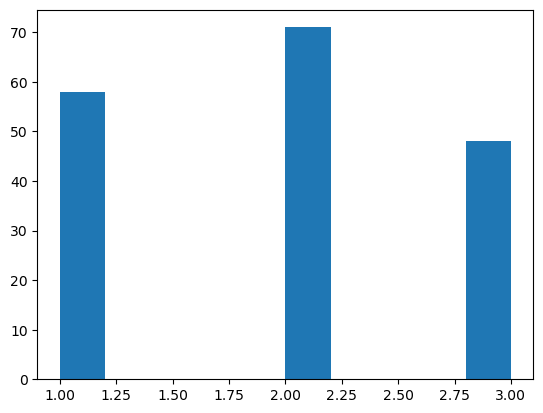

In [19]:
# Graficamos el histograma de la variable objetivo para verificar la cantidad de elementos de cada clase
plt.hist(data.Class)

In [20]:
# Determinarmos los predictores a utilizar que corresponde a las columnas del dataset exepto la columna de clase 
predictors_col = ["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
			    "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
target_col = ['Class']

In [21]:
# Creamos dos variables para almacenar la información de los predictores y de la variable objetivo, dividiendo el dataset en dos
predictors = data[predictors_col]
target = data[target_col]

In [52]:
# Entrenamos el modelo para evaluar las predicciones, utilizando un 80% en el entrenamiento y dejando un 20% para el test
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [53]:
# Creamos el árbol de decisiones
tree = DecisionTreeClassifier()

In [54]:
# Entrenamos el árbol de decisión con base al entrenamiento de nuestras predicciones y almacenamos el resultado en la variable arbol
arbol = tree.fit(X_train, y_train)

[Text(0.4583333333333333, 0.875, 'x[9] <= 3.82\ngini = 0.659\nsamples = 141\nvalue = [46, 56, 39]'),
 Text(0.25, 0.625, 'x[12] <= 1002.5\ngini = 0.113\nsamples = 50\nvalue = [3, 47, 0]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 3.07\ngini = 0.041\nsamples = 48\nvalue = [1, 47, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'x[6] <= 1.58\ngini = 0.583\nsamples = 91\nvalue = [43, 9, 39]'),
 Text(0.5, 0.375, 'x[2] <= 2.06\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.8333333333333334, 0.375, 'x[12] <= 697.5\ngini = 0.265\nsamples = 51\nvalue = [43, 8, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples 

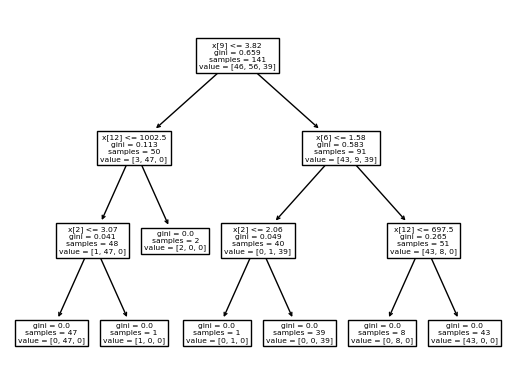

In [55]:
# Graficamos el árbol creado y previamente entrenado
plot_tree(arbol)

In [56]:
# Realizamos las predcciones sobre el 20% faltante que dejamos para realizar el test
predicciones = arbol.predict(X_test)

In [57]:
# Examinamos la matriz de confusión para evaluar las predicciones realizadas y verificar la exactitud
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,1,2,3
Actual,,,
1,10,2,0
2,1,14,0
3,0,0,9


In [58]:
# Con la medida de acurracy comparamos las predicciones con el valor real del dataset para verificar la exactitud del modelo realizado
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.9166666666666666

**Conclusiones**

1. El modelo realizado nos representa un 91% de exactitud de acuerdo al procentaje de entrenamiento y test que utilizamos, en este caso 80% de entrenamiento y 20% de test.

2. De acuerdo a los porcentajes de entrenamiento podemos concluir que entre más porcentaje de entrenamiento asignemos mayor exactitud en las predicciones tendra el modelo realizado.

3. Observando la gráfica podemos deducir que la probabilidad de que una persona padezca de diabetes, comienza a aumentar cuanto los niveles de glucosa están aproximadamente sobre 140 en adelante, pues en este punto la probabilidad es de 0.49.
